In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_test.shape

(10000, 28, 28)

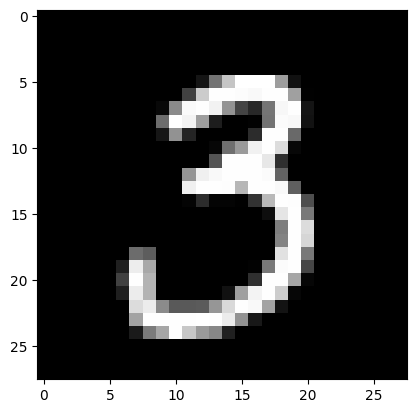

In [9]:
plt.imshow(x_test[90],cmap='grey')
plt.show()

In [13]:
x = x_test.reshape((-1,28*28))
y = y_test

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
X_ = sc.fit_transform(x)

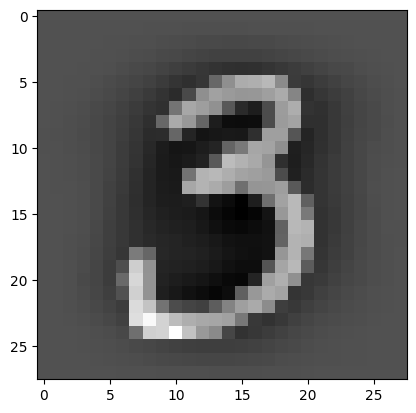

In [32]:
plt.imshow(X_[90].reshape((28,28)),cmap='grey')
plt.show()

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

In [64]:
Z_ = pca.fit_transform(X_)

In [65]:
Z_.shape

(10000, 2)

In [37]:
pca.explained_variance_

array([41.39893398, 28.35105808])

# Custom PCA

In [40]:
import numpy as np

In [44]:
#compute covar matrix
covar = np.dot(X_.T,X_)

In [45]:
covar.shape

(784, 784)

In [46]:
#Compute eigen vector using  svd
from numpy.linalg import svd

In [78]:
u,s,v = svd(covar)

In [79]:
u.shape

(784, 784)

In [80]:
ured = u[:,:2]
ured.shape

(784, 2)

In [81]:
#Project data on new axis
Z = np.dot(X_,ured)

In [82]:
Z.shape

(10000, 2)

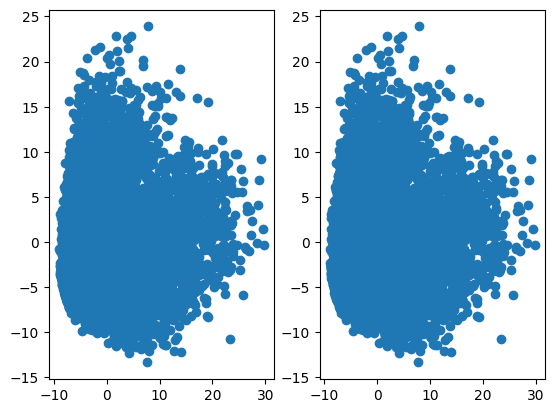

In [85]:
plt.subplot(1,2,1)
plt.scatter(Z[:,0],Z[:,1])
plt.subplot(1,2,2)
plt.scatter(Z_[:,0],Z_[:,1])

In [83]:
Z[:,0]=-Z[:,0]

In [84]:
Z

array([[-5.45831116,  6.41400668],
       [ 2.80443233, -8.02885014],
       [-7.41124146, -3.86404387],
       ...,
       [-5.00435204,  1.15364641],
       [-1.42085442, -4.42308066],
       [13.14268302, -4.26280299]])

In [72]:
Z_

array([[-5.45831116,  6.41400668],
       [ 2.80443233, -8.02885014],
       [-7.41124146, -3.86404387],
       ...,
       [-5.00435204,  1.15364641],
       [-1.42085442, -4.42308066],
       [13.14268302, -4.26280299]])

# Visualization

In [96]:
new_dataset = np.hstack((Z,y.reshape((-1,1))))
dataframe = pd.DataFrame(new_dataset,columns=["PC1","PC2","Labels"])

In [93]:
import seaborn as sns

<Figure size 1500x1500 with 0 Axes>

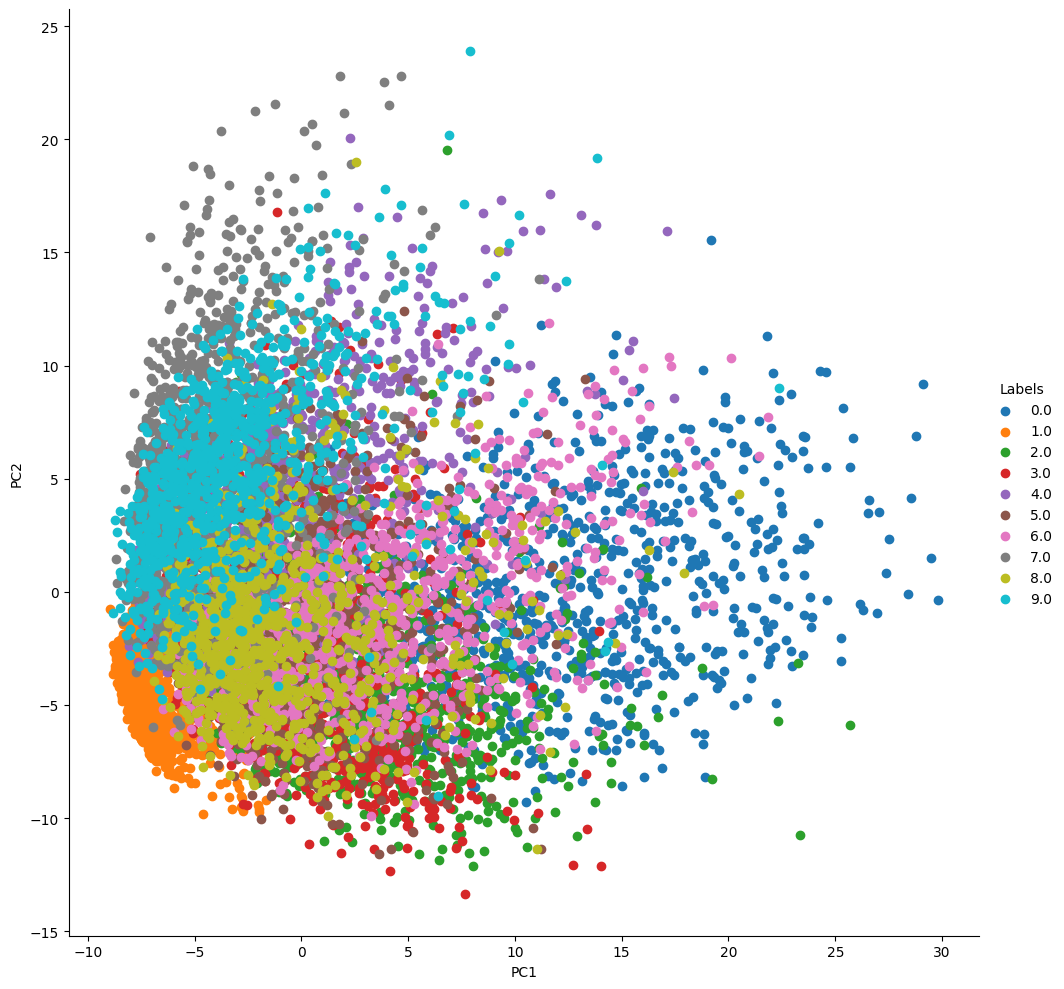

In [100]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe,hue = 'Labels',height=10)
fg.map(plt.scatter,'PC1',"PC2")
fg.add_legend()
plt.show()

# PCA with 784

In [101]:
pca = PCA()

In [103]:
Z_pca = pca.fit_transform(X_)

In [104]:
Z_pca.shape

(10000, 784)

In [105]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [106]:
print(cum_var_explained)

[0.06196825 0.10440571 0.14485024 0.17715614 0.20470687 0.22879812
 0.24925102 0.26808257 0.28479108 0.29996633 0.31468716 0.32779648
 0.34034829 0.35228998 0.36373924 0.37468893 0.38500726 0.39494763
 0.4044137  0.41352917 0.42242401 0.4310809  0.439552   0.44776835
 0.45563324 0.46333726 0.47090331 0.47823448 0.48532264 0.49215733
 0.49884345 0.5053854  0.51185667 0.51807696 0.52411842 0.53003733
 0.53585823 0.54159029 0.54724663 0.55277341 0.55828517 0.56376579
 0.56910488 0.57430115 0.5794262  0.58441841 0.58939824 0.59428976
 0.59907746 0.60376681 0.6083714  0.61291288 0.61737137 0.62177213
 0.62611217 0.63034858 0.63454437 0.63868709 0.64280317 0.64685943
 0.65086596 0.65473127 0.65854374 0.66229743 0.66596192 0.66957285
 0.67314234 0.6766452  0.68011477 0.68355655 0.68691319 0.69025179
 0.69355391 0.69682147 0.7000608  0.70324833 0.70639452 0.70948764
 0.71255969 0.71557651 0.71855513 0.72146596 0.72433806 0.72718373
 0.72999686 0.73274882 0.73546921 0.73816025 0.74082745 0.7434

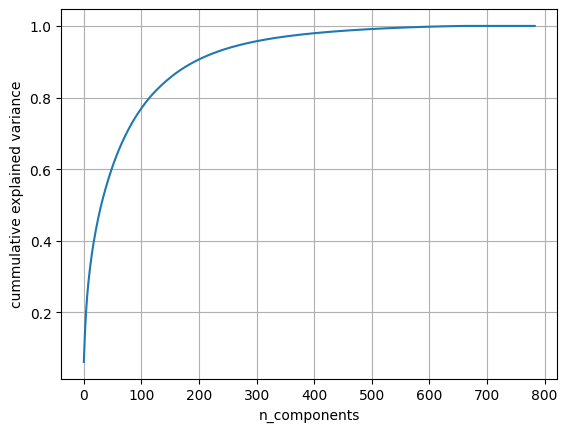

In [108]:
plt.plot(cum_var_explained)
plt.xlabel("n_components")
plt.ylabel("cummulative explained variance")
plt.grid()
plt.show()